# Baseline Model For Anomaly Detection

## Introduction

## Before running the notebook

Let's prepare the environement before running the notebook.  
Run the following command in the terminal from the **`final`** folder.

```sh
conda create -p envs/1_baseline python=3.11.7 -y
conda activate envs/1_baseline

pip install -r requirements/1_baseline.txt
```

## Model creation

In [2]:
import sys
sys.path.append('../code/')

from baseline import Baseline

In [3]:
config = {
    "img_width": 128,
    "img_height": 128,
    
    # Define the number of time to duplicate the dataset using augmentation
    # Ex: if you have 100 images and you choose 10 as multiplicator, then you'll train 1000 augmented images.
    # The image augmentation is just using a rotation
    "augmentation_multiplicator": 3,
    # Same but for test dataset
    "augmentation_test__multiplicator": 10,
    "epochs": 10,
    # Structure for the dataset
    # dataset/
    #   - test
    #       - anomaly
    #       - good
    #   - train
    #       - anomaly
    #       - good
    "dataset_path": "dataset"
}

baseline = Baseline(config)

In [4]:
baseline.prepare_dataset()


- Preparing dataset dataset/train to dataset/augmented
- Cleaning existing augmented directory
- Creating augmented directory and subdirectories good and anomaly
- Augmenting images (x3)... 
- Done

- Preparing dataset dataset/test to dataset/augmented_test
- Cleaning existing augmented directory
- Creating augmented directory and subdirectories good and anomaly
- Augmenting images (x10)... 
- Done
Found 128 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


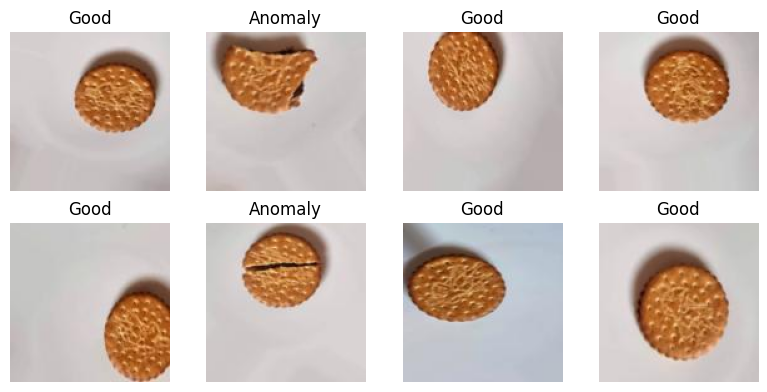

In [5]:
baseline.display_samples(baseline.train_generator, 8)

In [6]:
baseline.create_model()

In [7]:
baseline.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 3491778 (13.32 MB)
Trainable params: 34698

In [8]:
baseline.fit_model()

Epoch 1/10


4/4 [==============================] - 4s 470ms/step - loss: 1.3874 - accuracy: 0.3359 - val_loss: 0.9259 - val_accuracy: 0.3548
Epoch 2/10
4/4 [==============================] - 2s 389ms/step - loss: 0.9100 - accuracy: 0.5938 - val_loss: 0.8460 - val_accuracy: 0.3226
Epoch 3/10
4/4 [==============================] - 2s 391ms/step - loss: 0.9973 - accuracy: 0.5391 - val_loss: 0.7877 - val_accuracy: 0.3871
Epoch 4/10
4/4 [==============================] - 2s 400ms/step - loss: 0.7670 - accuracy: 0.5859 - val_loss: 0.7392 - val_accuracy: 0.4839
Epoch 5/10
4/4 [==============================] - 2s 396ms/step - loss: 0.7801 - accuracy: 0.6172 - val_loss: 0.6961 - val_accuracy: 0.6129
Epoch 6/10
4/4 [==============================] - 2s 411ms/step - loss: 0.6079 - accuracy: 0.6797 - val_loss: 0.6620 - val_accuracy: 0.6774
Epoch 7/10
4/4 [==============================] - 2s 393ms/step - loss: 0.5033 - accuracy: 0.7734 - val_loss: 0.6373 - val_accuracy: 0.7097
Epoch 8/10
4/4 [===============

5/5 [==============================] - 1s 85ms/step
Accuracy for class anomaly: 7.50%
Accuracy for class good: 96.36%
Tesing best threshold
5/5 [==============================] - 0s 83ms/step


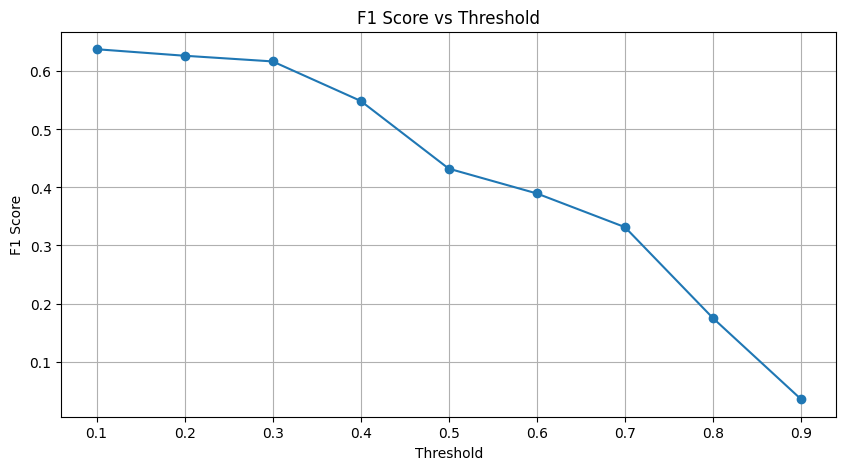

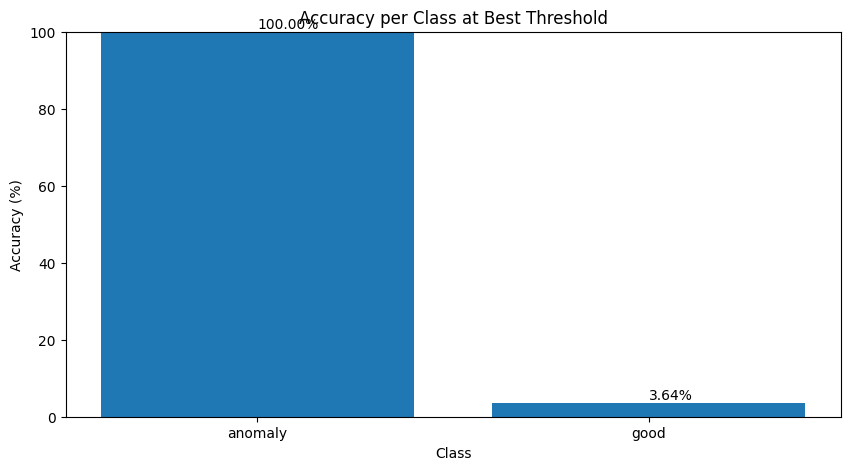

Best threshold: 0.10 with F1 Score: 0.6381


In [9]:
baseline.evaluate_model()
print("Tesing best threshold")
baseline.evaluate_best_treshold()

1/1 [==============================] - 0s 193ms/step


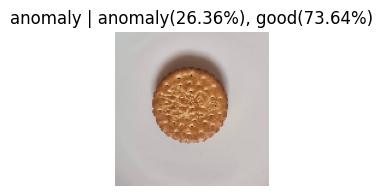

1/1 [==============================] - 0s 21ms/step


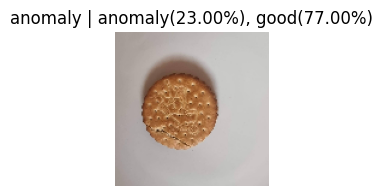

1/1 [==============================] - 0s 18ms/step


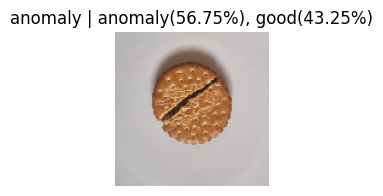

In [10]:
baseline.inference("inference/good.jpg", baseline.best_threshold)
baseline.inference("inference/anomaly.jpg",baseline.best_threshold)
baseline.inference("inference/anomaly2.jpg", baseline.best_threshold)

In [11]:
import tensorflow as tf
# Convert the model to TensorFlow Lite format  
converter = tf.lite.TFLiteConverter.from_keras_model(baseline.model)  
tflite_model = converter.convert()

# Save the converted model to a .tflite file  
with open('../output/baseline.tflite', 'wb') as f_out:  
    f_out.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/tmpm8qyaw_1/assets


INFO:tensorflow:Assets written to: /var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/tmpm8qyaw_1/assets
2024-04-16 09:53:56.944090: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-04-16 09:53:56.944103: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-04-16 09:53:56.944371: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/tmpm8qyaw_1
2024-04-16 09:53:56.952511: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-04-16 09:53:56.952520: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/tmpm8qyaw_1
2024-04-16 09:53:56.968476: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-04-16 09:53:56.977220: I tensorflow/cc/saved_model/load

### Inference with TFLite

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


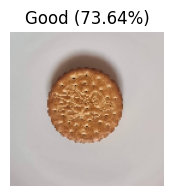

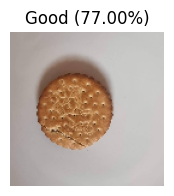

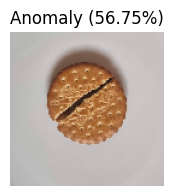

In [12]:
import tensorflow as tf  
from tensorflow.keras.preprocessing import image  
import numpy as np  
import matplotlib.pyplot as plt
  
# Load the TFLite model and allocate tensors.  
tflite_model_path = '../output/baseline.tflite'  
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()  
  
# Get input and output tensors.  
input_details = interpreter.get_input_details()  
output_details = interpreter.get_output_details()  
  
# Function to predict and display image for TFLite model  
def predict_and_display_image_tflite(image_path, interpreter):  
    img = image.load_img(image_path, target_size=(128, 128))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0) / 255.0  
  
    interpreter.set_tensor(input_details[0]['index'], img_array.astype('float32'))  
    interpreter.invoke()  
  
    prediction_score = interpreter.get_tensor(output_details[0]['index'])[0]  
  
    if prediction_score.ndim == 1:  # Multi-class case  
        class_prediction = np.argmax(prediction_score)  
        score = prediction_score[class_prediction] * 100  
        class_names = ['Anomaly', 'Good']  # Assuming class_names are defined in the same order as during model training  
        predicted_class_name = class_names[class_prediction]  
    else:  # Binary case, simplified for demonstration  
        if prediction_score < 0.5:  
            predicted_class_name = 'Anomaly'  
            score = (1 - prediction_score[0]) * 100  
        else:  
            predicted_class_name = 'Good'  
            score = prediction_score[0] * 100  
  
    plt.figure(figsize=(2, 2))  
    plt.imshow(img)  
    plt.axis('off')  
    plt.title(f'{predicted_class_name} ({score:.2f}%)')  
    plt.show()  
  
# Example usage  
predict_and_display_image_tflite("inference/good.jpg", interpreter)  
predict_and_display_image_tflite("inference/anomaly.jpg", interpreter)  
predict_and_display_image_tflite("inference/anomaly2.jpg", interpreter)

### Edge Impulse

#### Upload model

In [13]:
import edgeimpulse as ei
import os
from dotenv import load_dotenv

load_dotenv()

ei.API_KEY = os.getenv("EDGE_IMPULSE_API_KEY_BASELINE")

In [24]:
# Set model information, such as your list of labels
model_output_type = ei.model.output_type.Classification(labels=["anomaly","good"])
model_input_type = ei.model.input_type.ImageInput()

In [32]:
ei.model.list_profile_devices()

['alif-he',
 'alif-hp',
 'arduino-nano-33-ble',
 'arduino-nicla-vision',
 'portenta-h7',
 'brainchip-akd1000',
 'brickml',
 'cortex-m4f-80mhz',
 'cortex-m7-216mhz',
 'espressif-esp32',
 'himax-we-i',
 'infineon-cy8ckit-062s2',
 'infineon-cy8ckit-062-ble',
 'mbp-16-2020',
 'memryx-mx3',
 'nordic-nrf52840-dk',
 'nordic-nrf5340-dk',
 'nordic-nrf9160-dk',
 'jetson-nano',
 'jetson-orin-nx',
 'jetson-orin-nano',
 'openmv-h7p',
 'particle-p2',
 'raspberry-pi-4',
 'raspberry-pi-rp2040',
 'renesas-ck-ra6m5',
 'renesas-ek-ra8d1',
 'renesas-rzg2l',
 'renesas-rzv2l-cpu',
 'renesas-rzv2l',
 'st-iot-discovery-kit',
 'seeed-sense-cap',
 'wio-terminal',
 'seeed-vision-ai',
 'silabs-xg24',
 'silabs-thunderboard-sense-2',
 'sony-spresense',
 'synaptics-ka10000',
 'ti-am62a',
 'ti-am68a',
 'ti-launchxl',
 'ti-tda4vm',
 'neox']

In [31]:
try:
    profile = ei.model.profile(model=baseline.model,
                               device='jetson-nano')
    print(profile.summary())
except Exception as e:
    print(f"Could not profile: {e}")

INFO:tensorflow:Assets written to: /var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/tmp7qfyjuaf/saved_model/assets


INFO:tensorflow:Assets written to: /var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/tmp7qfyjuaf/saved_model/assets


Target results for float32:
{
    "device": "jetson-nano",
    "tfliteFileSizeBytes": 13856244,
    "isSupportedOnMcu": true,
    "memory": {
        "tflite": {
            "ram": 2568792,
            "rom": 13916608,
            "arenaSize": 2568448
        },
        "eon": {
            "ram": 2136576,
            "rom": 13869704
        }
    },
    "timePerInferenceMs": 42
}


Performance on device types:
{
    "variant": "float32",
    "lowEndMcu": {
        "description": "Estimate for a Cortex-M0+ or similar, running at 40MHz",
        "timePerInferenceMs": 643641,
        "memory": {
            "tflite": {
                "ram": 2568696,
                "rom": 13899360
            },
            "eon": {
                "ram": 2136288,
                "rom": 13865800
            }
        },
        "supported": true
    },
    "highEndMcu": {
        "description": "Estimate for a Cortex-M7 or other high-end MCU/DSP, running at 240MHz",
        "timePerInferenceMs": 8758,
 

In [33]:
ei.model.list_deployment_targets()

['zip',
 'arduino',
 'tinkergen',
 'cubemx',
 'wasm',
 'wasm-browser-simd',
 'wasm-node-simd',
 'tensorrt',
 'ethos',
 'synaptics-tensaiflow-lib',
 'drp-ai-lib',
 'meta-tf',
 'tidl-lib',
 'memryx-dfp',
 'tidl-lib-am62a',
 'tidl-lib-am68a',
 'slcc',
 'disco-l475vg',
 'arduino-nano-33-ble-sense',
 'arduino-nicla-vision',
 'runner-linux-aarch64-advantech-icam540',
 'espressif-esp32',
 'raspberry-pi-rp2040',
 'arduino-portenta-h7',
 'silabs-thunderboard2',
 'silabs-xg24',
 'himax-we-i',
 'himax-we-i-gnu',
 'infineon-cy8ckit-062s2',
 'infineon-cy8ckit-062-ble',
 'nordic-nrf52840-dk',
 'nordic-nrf5340-dk',
 'nordic-nrf9160-dk',
 'nordic-thingy53',
 'nordic-thingy53-nrf7002eb',
 'nordic-thingy91',
 'nordic-nrf7002-dk',
 'openmv',
 'openmv-fw',
 'sony-spresense',
 'sony-spresense-commonsense',
 'ti-launchxl',
 'synaptics-ka10000',
 'renesas-ck-ra6m5',
 'brickml',
 'brickml-module',
 'renesas-ek-ra8d1',
 'alif-ensemble-e7',
 'seeed-grove-vision-ai',
 'seeed-sensecap',
 'runner-linux-aarch64',
 

In [34]:
deploy_bytes = ei.model.deploy(model=baseline.model,
                            model_output_type=model_output_type,
                            model_input_type=model_input_type,
                            deploy_target='runner-mac-x86_64')


INFO:tensorflow:Assets written to: /var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/tmpr8ayj27r/saved_model/assets


INFO:tensorflow:Assets written to: /var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/tmpr8ayj27r/saved_model/assets


In [38]:
deploy_bytes

In [39]:
if deploy_bytes:
    with open("../output/baseline.eim", 'wb') as f:
        f.write(deploy_bytes.getvalue())

In [45]:
# For the macos model
!chmod +x "../output/baseline.eim"


#### EIM Inference

In [62]:
from edge_impulse_linux.image import ImageImpulseRunner
import cv2  

model = "../output/baseline.eim"
modelfile = os.path.join(model)
print("modelfile", modelfile)

def ei_inference(img_path):
    with ImageImpulseRunner(modelfile) as runner:
        model_info = runner.init()
        # print("model_info", model_info)
        
        # Load the image directly from the disk  
        original_image = cv2.imread(img_path, cv2.IMREAD_COLOR)  
        # Convert the image from BGR to RGB (since OpenCV loads images in BGR format)  
        img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  
        
        features, cropped = runner.get_features_from_image(img)
        # print("FEATURES", len(features), len(cropped))
        
        # print("GO")
        res = runner.classify(features)
        print(res["result"]["classification"], f"Is anomaly: {res['timing']['anomaly']}")

ei_inference("inference/good.jpg")
ei_inference("inference/anomaly.jpg")
ei_inference("inference/anomaly2.jpg")

modelfile ../output/baseline.eim
{'anomaly': 0.19141310453414917, 'good': 0.8085868954658508} Is anomaly: 0
{'anomaly': 0.27157214283943176, 'good': 0.7284279465675354} Is anomaly: 0
{'anomaly': 0.5558916926383972, 'good': 0.4441083073616028} Is anomaly: 0
